### Load required libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [14]:
data = pd.read_csv("/content/drive/MyDrive/Academics/Batch-77A/Day3/today/Fraud_data_amtstd.csv")

### Understand the data

#### Display No. of records and attributes 

 Observation: 
 
        Data has 30 attributes and 1 lakh records

#### Look at first 5 records

#### Display column names

#### Data distribution w.r.t target attributes

In [15]:
print(pd.value_counts(data['Class']))

print(pd.value_counts(data['Class'])/data['Class'].shape[0])

0    99508
1      492
Name: Class, dtype: int64
0    0.99508
1    0.00492
Name: Class, dtype: float64




#### Bar plot

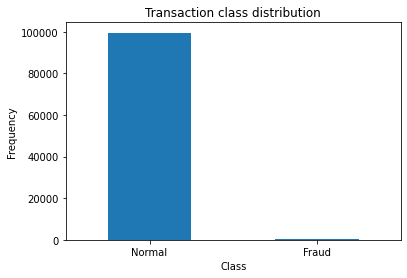

In [16]:
# Drawing a barplot
pd.value_counts(data['Class']).plot(kind = 'bar', rot=0)

# Giving titles and labels to the plot
plt.title("Transaction class distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");

    O = Normal

    1 = Fraud

#### Extract numpy array from the DataFrame

In [17]:
data = data.values

### Train test split

    Splitting the data into train and test, such that train data has only non-fraud records and test data has both. 

In [18]:
data_nf = data[data[:,-1] == 0]
test_f  = data[data[:,-1] == 1]

train_nf, test_nf = train_test_split(data_nf, test_size=0.2, random_state=123)

In [19]:
print(data.shape)
print(train_nf.shape)
print(test_nf.shape)
print(test_f.shape)

(100000, 30)
(79606, 30)
(19902, 30)
(492, 30)


#### Look at the distribution w.r.t target attribute

In [20]:
print(np.unique(data[:,-1], return_counts=True))
print(np.unique(train_nf[:,-1], return_counts=True))
print(np.unique(test_nf[:,-1], return_counts=True))
print(np.unique(test_f[:,-1], return_counts=True))

(array([0., 1.]), array([99508,   492]))
(array([0.]), array([79606]))
(array([0.]), array([19902]))
(array([1.]), array([492]))


#### Only extract independent features

In [21]:
X_train_nf = train_nf[:,:-1]

X_test_nf = test_nf[:,:-1]

X_test_f = test_f[:,:-1]

### Build Autoencoder

In [22]:
input_dim = X_train_nf.shape[1]
encoding_dim = 150

In [24]:
# Input placeholder
input_layer = Input(shape=(input_dim,))

input_dropout = Dropout(0.2)(input_layer)
 
# "encoded" is the encoded representation of the input
encoded_layer = Dense(encoding_dim, activation='relu')(input_dropout)

# "decoded" is the lossy reconstruction of the input
decoded_layer = Dense(input_dim, activation='linear')(encoded_layer)

In [25]:
from tensorflow.keras.models import Model

In [27]:
autoencoder = Model(input_layer, decoded_layer)

In [28]:
autoencoder.compile(optimizer='adam', 
                    loss = 'mean_squared_error')

In [29]:
autoencoder.fit(X_train_nf, X_train_nf, epochs=20, batch_size=128)

Epoch 1/20
622/622 [==============================] - 1s 1ms/step - loss: 0.5033
Epoch 2/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1723
Epoch 3/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1607
Epoch 4/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1485
Epoch 5/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1453
Epoch 6/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1315
Epoch 7/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1319
Epoch 8/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1262
Epoch 9/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1198
Epoch 10/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1153
Epoch 11/20
622/622 [==============================] - 1s 2ms/step - loss: 0.1199
Epoch 12/20
622/622 [==============================] - 1s 1ms/step - loss: 0.1144
Epoch 13/20
622/622 [====

In [30]:
autoencoder.evaluate(X_train_nf, X_train_nf)

2488/2488 [==============================] - 2s 831us/step - loss: 0.0405


0.040469344705343246

In [31]:
autoencoder.evaluate(X_test_nf, X_test_nf)

622/622 [==============================] - 1s 845us/step - loss: 0.0407


0.04071503132581711

In [32]:
autoencoder.evaluate(X_test_f, X_test_f)

16/16 [==============================] - 0s 1ms/step - loss: 2.8015


2.8015100955963135

In [35]:
pred_train_nf = autoencoder.predict(X_train_nf)
pred_test_nf = autoencoder.predict(X_test_nf)

In [36]:
# mean squared error for each  record

def mse_eachrecord(act, pred):
  error = act-pred
  sq_error = np.square(error)
  mean_sq_error = np.mean(sq_error, axis=1)
  return mean_sq_error

In [40]:
# mean squared error for each non fradulent train record

mse_train_nf = mse_eachrecord(X_train_nf, pred_train_nf)

# mean squared error for each non fradulent test record

mse_test_nf = mse_eachrecord(X_test_nf, pred_test_nf)

In [44]:
pred_test_f = autoencoder.predict(X_test_f)

# mean squared error for each fradulent test record

mse_test_f = mse_eachrecord(X_test_f, pred_test_f)

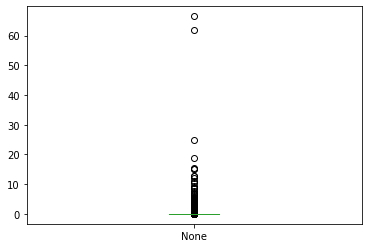

In [46]:
pd.Series(mse_train_nf).plot(kind='box')

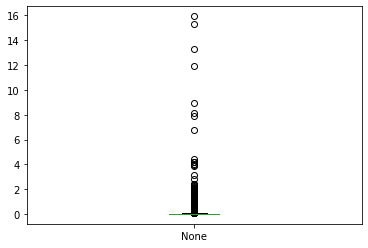

In [47]:
pd.Series(mse_test_nf).plot(kind='box')

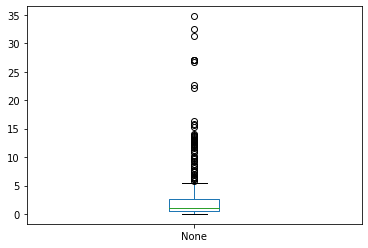

In [48]:
pd.Series(mse_test_f).plot(kind='box')

In [50]:
print('Train No-Fraud Mean Error', np.mean(mse_train_nf))
print('Test No-Fraud Mean Error', np.mean(mse_test_nf))
print('Test Fraud Mean Error', np.mean(mse_test_f))

Train No-Fraud Mean Error 0.040469371491794144
Test No-Fraud Mean Error 0.04071502368053668
Test Fraud Mean Error 2.8015102483094423


In [81]:
np.percentile(mse_train_nf, 99)

0.4259887945704376

In [82]:
out = (pd.Series(mse_test_f) >  0.42)

In [83]:
pred_f = out.astype('int')

In [84]:
sum(pred_f)

384

In [75]:
pred_test_f.shape

(492, 29)

In [55]:
def obtain_target(pred):
  if(pred > np.mean(mse_train_nf)):
      return 1
  else:
      return 0

In [67]:
obtain_target(pd.Series(mse_test_f))

ValueError: ignored